# Libraries

In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configuration File and Frozen Graph from Github
### https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API

In [5]:
frozen_path = r'D:\Data Analytics for Business\Keras learning\object detection_cv2\frozen_inference_graph.pb'
confi = r'D:\Data Analytics for Business\Keras learning\object detection_cv2\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

## Initialised a model

In [6]:
model = cv2.dnn_DetectionModel(frozen_path,confi)

 **Got the classes associated with it. See labels.txt for that**

In [8]:
with open ('D:\Data Analytics for Business\Keras learning\object detection_cv2\labels.txt','rt') as file:
    classes = file.read().rstrip('\n').split('\n')

In [ ]:
classes

In [19]:
im = cv2.imread(r'D:\Data Analytics for Business\Keras learning\object detection_cv2\img.jpg',cv2.IMREAD_COLOR)


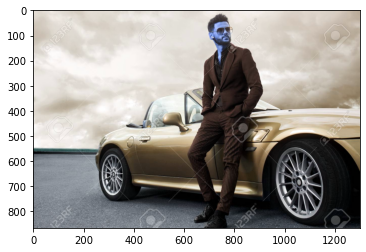

In [20]:
plt.imshow(im)

In [11]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0000022E69EE7850>

In [21]:
classindex,confidence,bbbox = model.detect(im,confThreshold=0.55)

# model.predict returns a class index , the confidence level of the prediction and the cordinates of the box

In [22]:
for index,conf,box in zip(classindex.flatten(),confidence.flatten(),bbbox):
    cv2.rectangle(im,box,(255,0,0),2)
    cv2.putText(im,classes[index-1],(box[0]+10,box[1]+40),fontFace=cv2.FONT_HERSHEY_PLAIN,fontScale=3,color=(0,225,0),thickness=3)

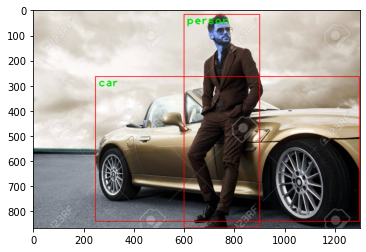

In [23]:
plt.imshow(im)

In [24]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise('Video cannot be opened')

while True:
    ret,frame = cap.read()

    classindex,confidence,bbbox = model.detect(frame,confThreshold=0.6)
    if len(classindex)!=0:
        for index,conf,box in zip(classindex.flatten(),confidence.flatten(),bbbox):
            if index <=80:
                cv2.rectangle(frame,box,(255,0,0),2)
                cv2.putText(frame,classes[index-1],(box[0]+10,box[1]+40),fontFace=cv2.FONT_HERSHEY_PLAIN,fontScale=3,color=(0,225,0),thickness=3)
    cv2.imshow('Object Detection',frame)

    if cv2.waitKey(delay=2) & 0xFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()